<h2>Ques. 1</h2>

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans1:
  >For matrices $$A = (n, k)$$ and $$B = (k, m) $$we will have the row of A mulitplied with the column of B. This dot product will involve in total k multiplicaton. We will get the resultant matrix $$(n, m)$$ In total there will be n*m elements. for each element there will be k multiplications so in total the number of multiplications will be n*m*k. For each element of the resultant matrix we will have to add up the k multiplications so we will need $$(k-1) $$additions. For the entire matrix total additions will be  $$n*m*(k-1)$$

---



<h2>Ques. 2</h2>

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Ans2:
>NumPy uses contiguous allocation of memory which helps in efficient utilization by the CPU as when processing most likely the following data is already ready in the queue to be processed. Whereas, in list the data is scattered in the memory which causes delay.
 NumPy uses vectorized operations, i.e. it can perform operations on the entire array at once and then there is no need of looping. whereas, in list we need to implement loops in order to access elements separately.  
Also, numpy functions are based on C language which is very efficient and fast which maked the numPy faster than list of lists.


In [54]:
import time

def matrixMulUsingListOfLists(x, y):
    n, k = len(x), len(x[0])
    k, m = len(y), len(y[0])
    res = [[0] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                res[i][j] += x[i][l] * y[l][j]
    return res

x = [[1, 2, 3], [4, 5, 6]]
y = [[7, 8], [9, 10], [11, 12]]

startingTime = time.time()
resList = matrixMulUsingListOfLists(x, y)
endingTime = time.time()
listsTime = endingTime - startingTime
print("List of lists time:", listsTime)


List of lists time: 0.00010561943054199219


In [55]:
import numpy as np

def matrixMulUsingNumpy(x, y):
    return np.matmul(x, y)

x_np = np.array(x)
y_np = np.array(y)

startingTime = time.time()
result_numpy = matrixMulUsingNumpy(x_np, y_np)
endingTime = time.time()
numpyTime = endingTime - startingTime
print("NumPy time:", numpyTime)


NumPy time: 0.00013303756713867188




---



<h2>Ques. 4</h2>


What is the gradient of the following function with respect to x and y?
x^2y + y^3sin(x)

Ans 4:
> $$f = x^2y + y^3sin(x)$$<br>
Partial derivative with respect to x: $$\frac{df}{dx} = 2xy + y^3\cos(x) $$<br>
Partial derivative with respect to x: $$\frac{df}{dy} = x^2 + 3y^2sin(x) $$<br>
Thus, Resultant gradient: $$f(x, y) = 2xy + y^3cos(x), x^2 + 3y^2sin(x)$$<br>
Here, x (i.e. the first component) represents the rate of change of function in y direction. And y (i.e. the second component) represents the rate of change of function in y direction.

---






<h2>Ques. 5</h2>

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [56]:
import jax
import jax.numpy as jnp
from jax import grad

@jax.jit
def f(x, y):
    return jnp.sum(x**2 * y + y**3 * jnp.sin(x))  # Sum to get a scalar output


key = jax.random.PRNGKey(42)  # Set a random seed for reproducibility
xVals = jax.random.uniform(key, (5, ))  # Generate 5 random values for x
yVals = jax.random.uniform(key, (5, ))  # Generate 5 random values for y

#compting gradient
gradientF = grad(f)
gradientVals = gradientF(xVals, yVals)

#analytical gradient
analyticalGradVals = jnp.stack([2 * xVals * yVals + yVals**3 * jnp.cos(xVals), xVals**2 + 3 * yVals**2 * jnp.sin(xVals)], axis=1)

#results
print("JAX gradients:", gradientVals)
print("Analytical gradients:", analyticalGradVals)


JAX gradients: [1.3549877  1.9348412  0.08461008 0.09551075 0.07604416]
Analytical gradients: [[1.3549877  1.5980151 ]
 [1.9348412  2.4866657 ]
 [0.08461008 0.06118227]
 [0.09551075 0.07021526]
 [0.07604416 0.05421515]]




---



<h2>Ques. 7</h2>


Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like: ...



In [57]:
stud_records = {
    "2022": {
        "Branch 1": {
            "1": {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    # ... other subjects
                }
            },
            # ... Data in Branch 1
        },
        "Branch 2": {
            # ... Data Branch 2
        }
    },
    "2023": {
        # ... Data of bath of 2023
    },
    "2024": {
        # ... Data of bath of 2024
    },
    "2025": {
        # ... Data of bath of 2025
    }
}




---



<h2>Ques. 8</h2>


Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [58]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def AddStudent(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def AddBranch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def AddYear(self, year):
        self.years.append(year)


database = Database()

year2023 = Year(2023)
branch1 = Branch("Branch 1")
branch1.AddStudent(Student("N", 1, {"Maths": 99, "English": 89}))
year2023.AddBranch(branch1)

database.AddYear(year2023)

#extracting the marks of a student of batch 2023
student = database.years[0].branches[0].students[0]
print(student.marks["Maths"])


99




---



<h2>Ques. 9</h2>

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
$$y=x$$
$$y=x^2$$
$$y=\frac{x^3}{100}$$
$$y=sin(x)$$
$$y=\frac{sin(x)}{x}$$
$$y=log(x)$$
$$y=e^x$$

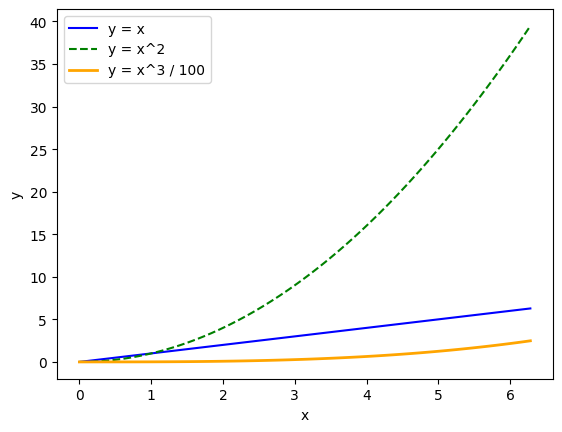

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values from 0 to 2*pi
x = np.linspace(0, 2 * np.pi, 100)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100


# Title and labels
plt.plot(x, y1, label='y = x', color='blue')
plt.plot(x, y2, label='y = x^2', color='green', linestyle='--')
plt.plot(x, y3, label='y = x^3 / 100', color='orange', linewidth=2)


plt.xlabel('x')
plt.ylabel('y')

# Show the legend
plt.legend()

# Show the plot
plt.show()



<ipython-input-66-5158c31c0292>:9: RuntimeWarning: invalid value encountered in divide
  y2 = np.sin(x) / x
<ipython-input-66-5158c31c0292>:10: RuntimeWarning: divide by zero encountered in log
  y6 = np.log(x)


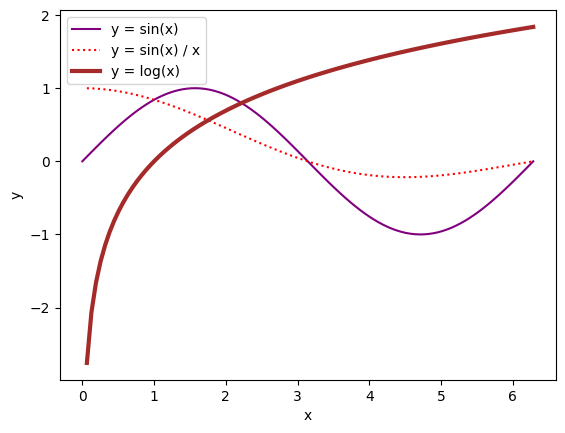

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values from 0 to 2*pi
x = np.linspace(0, 2 * np.pi, 100)

# Calculate the sine of each x value
y1 = np.sin(x)
y2 = np.sin(x) / x
y6 = np.log(x)


# Title and labels
plt.plot(x, y1, label='y = sin(x)', color='purple')
plt.plot(x, y2, label='y = sin(x) / x', color='red', linestyle=':')
plt.plot(x, y6, label='y = log(x)', color='brown', linewidth=3)

plt.xlabel('x')
plt.ylabel('y')

# Show the legend
plt.legend()

# Show the plot
plt.show()


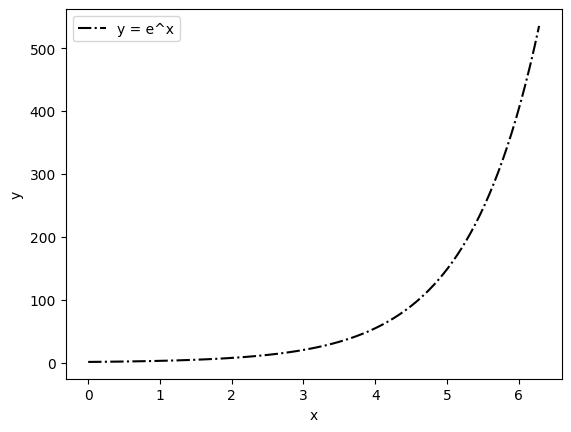

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values from 0 to 2*pi
x = np.linspace(0, 2 * np.pi, 100)

# Calculate the sine of each x value
y = np.exp(x)


# Title and labels
plt.plot(x, y, label='y = e^x', color='black', linestyle='-.')

plt.xlabel('x')
plt.ylabel('y')

# Show the legend
plt.legend()

# Show the plot
plt.show()




---



<h2>Ques. 10</h2>


 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [62]:
import numpy as np
import pandas as pd

# Generate matrix with random vals between 1 and 2
randomMatrix = np.random.uniform(low=1, high=2, size=(20, 5))
print(randomMatrix)

# Create the DataFrame from the NumPy matrix
df = pd.DataFrame(randomMatrix, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
colHighestSD = df.std().idxmax()
print("Highest standard deviation column:", colHighestSD)

# Find the row with the lowest mean
rowLowestMean = df.mean(axis=1).idxmin()
print("Lowest mean row:", rowLowestMean)



[[1.85216255 1.36962577 1.10949163 1.3636067  1.70804706]
 [1.11452008 1.07768747 1.8013942  1.78721157 1.12348856]
 [1.50058066 1.99303136 1.38123915 1.66187285 1.09800815]
 [1.40984598 1.56317022 1.23760963 1.02271176 1.71647414]
 [1.74044553 1.48694898 1.57213596 1.90545357 1.53405777]
 [1.95675027 1.66377738 1.65094644 1.46756172 1.791821  ]
 [1.80461181 1.39887993 1.62979239 1.58259478 1.30229852]
 [1.22081671 1.42175309 1.89822639 1.54420585 1.54781127]
 [1.80640799 1.04859803 1.02425367 1.96677911 1.8204697 ]
 [1.66047236 1.13876526 1.62961922 1.98641799 1.92873703]
 [1.03012162 1.3882577  1.08036985 1.89743978 1.57626482]
 [1.62507162 1.14477932 1.4337826  1.1201488  1.1936224 ]
 [1.23876609 1.28931978 1.78970638 1.47748072 1.00632419]
 [1.94228505 1.45500445 1.39043043 1.36816583 1.20137261]
 [1.43634848 1.06390249 1.58437011 1.40568095 1.56479541]
 [1.76274232 1.74628987 1.87772215 1.55086925 1.49104717]
 [1.44199023 1.53484701 1.6260013  1.11195022 1.814924  ]
 [1.35020795 1



---



<h2>Ques. 11</h2>


Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [63]:
# Add the "f" column as the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create the "g" column based on the value in "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Count rows with "LT8" in column "g"
lt8Count = df[df['g'] == 'LT8'].shape[0]
print("Number of rows with 'LT8' in 'g':", lt8Count)
# Count rows with "GT8" in column "g"
lt8Count = df[df['g'] == 'GT8'].shape[0]
print("Number of rows with 'GT8' in 'g':", lt8Count)

# Calculate standard deviations for "f" based on "g"
stdLt8 = df[df['g'] == 'LT8']['f'].std()
stdGt8 = df[df['g'] == 'GT8']['f'].std()
print("Standard deviation of 'f' for 'LT8':", stdLt8)
print("Standard deviation of 'f' for 'GT8':", stdGt8)



Number of rows with 'LT8' in 'g': 16
Number of rows with 'GT8' in 'g': 4
Standard deviation of 'f' for 'LT8': 0.3620776905138362
Standard deviation of 'f' for 'GT8': 0.12404769779176232




---



<h2>Ques. 12</h2>

 Write a small piece of code to explain broadcasting in numpy.

In [64]:
import numpy as np

arr1 = np.array([[1, 2, 3]])
arr2 = np.array([4, 5, 6])

# Multiplication with broadcasting: arr1 is replicated along the new axis
result = arr1 + arr2
print(result)


[[5 7 9]]




---



<h2>Ques. 13</h2>

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.


In [65]:
import numpy as np

#custom function
def my_argmin(arr):
    if arr.size == 0:
        return None

    min_index = 0
    min_value = arr[0]

    for i in range(1, arr.size):
        if arr[i] < min_value:
            min_index = i
            min_value = arr[i]

    return min_index

arr = np.array([4, 2, 1, 5, 3])

# Get the argmin using the custom function
my_argmin_result = my_argmin(arr)

# Get the argmin using NumPy's built-in function
np_argmin_result = np.argmin(arr)

print("Custom argmin:", my_argmin_result)
print("NumPy argmin:", np_argmin_result)


Custom argmin: 2
NumPy argmin: 2




---

